## MMSB: Beer Survey

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import mmsb
import utils

%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.debugger import Tracer
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [2]:
data = pd.read_csv('../data/all_our_ideas/2565/2565_dat.csv', header=None)
text = pd.read_csv('../data/all_our_ideas/2565/2565_text_map.csv', header=None)[1]
data.head()

,0,1,2,3
0,2,5,0,749d8459047a7c024738d643524b889a
1,11,20,0,0cdd2260af00904baedc94baa0050fd6
2,2,19,1,f933c71f15dfb64842fd9832e3734ad4
3,4,11,1,f933c71f15dfb64842fd9832e3734ad4
4,9,20,0,0cdd2260af00904baedc94baa0050fd6


In [3]:
data = data[data[3] == '1bc8052fc357986cea6bf530ff4d5d3a'] # Most prolific user

In [4]:
X = data[[0,1,2]].values
X.shape

(1244, 3)

In [5]:
V = max(X[:,1]) + 1
V

27

In [7]:
I = pd.DataFrame(utils.get_interactions(X))

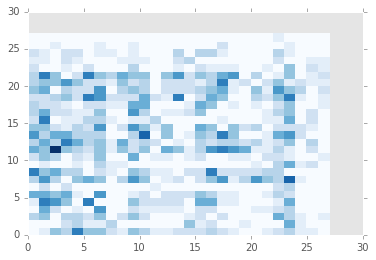

In [8]:
plt.pcolor(I, cmap='Blues')

## Tests

0:00:03.451394


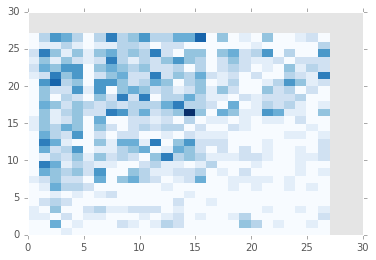

In [10]:
K = 3
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, K, n_iter=400)
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

In [11]:
pd.DataFrame(B).round(3)

,0,1,2
0,0.500,0.099,0.088
1,0.901,0.500,0.105
2,0.912,0.895,0.500


In [ ]:
gamma_df = pd.DataFrame(gamma.T, index=text.apply(lambda x: x[:50]))

In [ ]:
gamma_df[0].sort_values(ascending=False).iloc[:10]

In [ ]:
gamma_df[1].sort_values(ascending=False).iloc[:10]

In [ ]:
gamma_df[2].sort_values(ascending=False).iloc[:10]